# Single layer perceptron

**Contents:**
1. [Perceptron for a line](#perceptron-for-a-line)
    * [SingleLayerPerceptron](#single-layer-perceptron)
    * [Line](#line)
2. [Perceptron for a n-dimentional hyperplane](#ndim)
    * [F](#F)

## <a name='perceptron-for-a-line'>Perceptron for a line </a>

How does is work?
The perceptron represents a system of liniar eqations,for which we need to define coefficients. We do so using gradient.
It is not a theoretical document, so if you want more details, just google it.

At first, we need to import all the necessary packages.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In below code we describethe a class <a name='single-layer-perceptron'>`SingleLayerPerceptron`</a> that will manage all the processing. 

In [2]:
class SingleLayerPerceptron:
    def __init__(self, num_in, num_out, alpha=0.01):
        self.num_in = num_in
        self.num_out = num_out
        self.weights = np.random.random(num_in * num_out).reshape(num_in, num_out)
        self.T = np.random.random(num_out)
        self.alpha = alpha
        self.X = None
    
    def forward(self, X):
        assert len(X) == self.num_in
        self.X = X
        Y = [0] * self.num_out
        for i in range(self.num_in):
            for j in range(self.num_out):
                Y[j] += X[i] * self.weights[i, j]
        return Y
    
    def backprop(self, error):
        # adaptive alpha
        # self.alpha = 1 / (1 + sum([x ** 2 for x in self.X]))
        if self.X is None:
            return
        for j in range(self.num_out):
            for i in range(self.num_in):
                self.weights[i, j] -= self.alpha * self.X[i] * error[j]
            self.T[j] += self.alpha * error[j]

This class has the methods `forward(...)` and `backprop(...)`. The first one get a sample as input and generate output using weigths and bias. `backprop(...)` updates weights and biases of the net. 

Another class <a name='line'>`Line`</a> will help us to generate values for a line with given *a* and *b* parameters.

In [3]:
class Line:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def __call__(self, x):
        return self.a * x + self.b
    
    def get(self, X):
        return [self.__call__(x) for x in X]

The line will correspond to the following formala

$$ y = a x + b $$

Now let's demonstrate how we can use it.

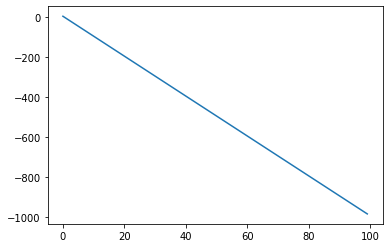

In [4]:
line = Line(a=-10, b=5)
test_line_points = line.get(range(100))
plt.plot(test_line_points)
plt.show()

As we thought, this is line :)

In [5]:
slp = SingleLayerPerceptron(num_in=1, num_out=1, alpha=0.0001)

The above line of code creates an instance of [`SingleLayerPerceptron`](#single-layer-perceptron) class.

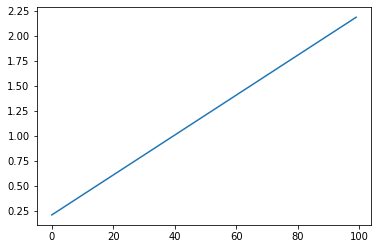

In [6]:
points_from_perceptron = Line(slp.weights[0][0], slp.T[0]).get(range(100))
plt.plot(points_from_perceptron)
plt.show()

If we plot line with `a` = `weights[0][0]` and `b` = `T[0]` we will receive a line that the given perceptron generate (picture above). It's because perceptron uses the formula

$$y_{j} = \sum_{i = 1}^{num\_in} w_{ij} x_{i} + T_{j}$$

Ok, now we can generate training and test sets. After that we can finally train our perceptron and estimate its accuracy.

Total test error before training: 31863.750329365463
Start error: -5.0
Final error: 0.015196365279280144
Total test error after training: 6.650026429298805


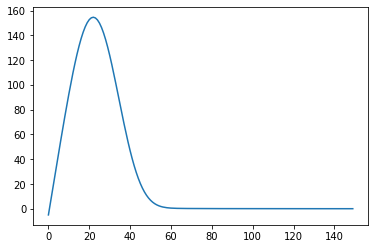

In [7]:
train_set = np.arange(0, 150)
test_set = np.arange(150, 170)


def test():
    '''
    This function is called to estimate
    total error from test_set
    
    retval: total error from test set
    '''
    test_errors = []
    for x in test_set:
        y = slp.forward([x])
        error = y[0] - line(x) 
        test_errors.append(error)
    return sum(test_errors)
    

# estimation of error before training
print('Total test error before training: {}'.format(test()))

    
# training
errors = []
for x in train_set:
    y = slp.forward([x])
    error = y[0] - line(x)
    errors.append(error)
    slp.backprop([error])

print('Start error: {}'.format(errors[0]))
print('Final error: {}'.format(errors[-1]))


# estimation of error after training
print('Total test error after training: {}'.format(test()))


plt.plot(errors)
plt.show()

As we can see, model has trained so that total error from test set has became really low regarding start error value.

Let's now plot actual line and line, generated with perceptron.

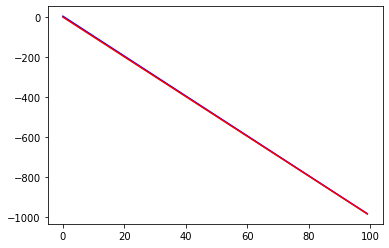

In [8]:
plt.plot(line.get(range(100)), color='blue')
plt.plot(Line(slp.weights[0][0], slp.T[0]).get(range(100)), color='red')
plt.show()

Red line is maid by perceptron. Blue one is actual line. They are almost collinear

## <a name='ndim'>Perceptron for a n-dimentional hyperplane </a>

Let's now define a bit sophisticated example. Now we'll have linear <a name='F'>function</a> that gets sample of arbitrary assigned size (e.g. 100) and uses randomly generated coefficients to calculate result. The final formula:

$$y = \sum_{i = 1}^{size} c_{i} x_{i} + c_{size - 1}$$

In [9]:
class F:
    def __init__(self, size=100):
        self.size = size
        self.coeffs = np.random.random(size+1,)
    
    def __call__(self, X):
        assert len(X) == self.size
        y = self.coeffs[-1]
        y += sum(x * c for x, c in zip(X, self.coeffs))
        return y

The above class defines a function that we describe before. It gets some sample and generates result based on it.

In [10]:
f = F(size=10)
x = np.random.random(f.size)
print('f: {}...{} -> {:.3f}'.format(x[0:2], x[-2:], f(x)))

f: [0.98771408 0.93942513]...[0.06093267 0.69876871] -> 3.693


Total error of 20 test samples: [35.69354669]
Error per sample: [1.78467733]
Total error of 20 test samples: [21.46796906]
Error per sample: [1.07339845]


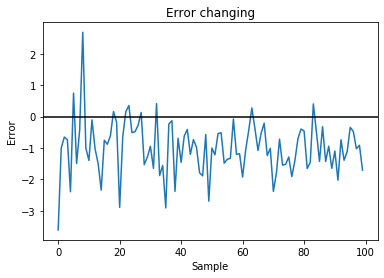

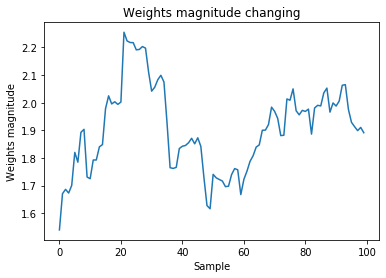

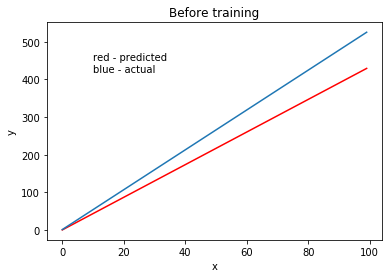

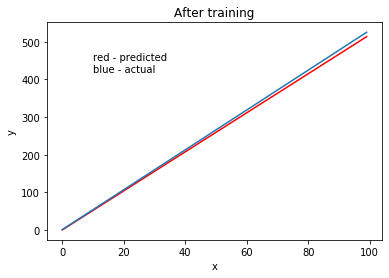

In [25]:
slp = SingleLayerPerceptron(num_in=f.size, num_out=1, alpha=0.03)


def test():
    '''
    This funciton is supposed to 
    calculate error on test set
    and then show results
    '''
    test_errors = []
    for x in test_set:
        error = abs(slp.forward(x) - f(x))
        test_errors.append(error)
    print('Total error of {} test samples: {}'.format(len(test_set), sum(test_errors)))
    print('Error per sample: {}'.format(sum(test_errors) / len(test_set)))


# sets for visualization
X_check = [[x]*f.size for x in range(100)]
Y_actual = [f(x) for x in X_check]
Y_slp_origin = [slp.forward(x) for x in X_check]

# training and testing sets
train_set_size, test_set_size = 100, 20
train_set = [(np.random.random(f.size) - 0.5) * 5 for _ in range(train_set_size)]
test_set = [(np.random.random(f.size) - 0.5) * 5 for _ in range(train_set_size, train_set_size + test_set_size)]

# testing before training
test()

# training
errors = []
weights_dynamic = []
for x in train_set:
    weights_dynamic.append(np.linalg.norm(slp.weights))
    y = slp.forward(x)
    error = y - f(x)
    errors.append(error)
    slp.backprop([error])
    
# testing after training
test()

# visualization of weights and error dynamic
plt.plot(errors)
plt.title('Error changing')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.axhline(y=0, color='black')
plt.show()

plt.plot(weights_dynamic)
plt.title('Weights magnitude changing')
plt.xlabel('Sample')
plt.ylabel('Weights magnitude')
plt.show()


# visualization of states (before training and after training)
Y_slp_final = [slp.forward(x) for x in X_check]
plt.plot(Y_slp_origin, color='red')
plt.plot(Y_actual)
plt.title('Before training')
plt.xlabel('x')
plt.ylabel('y')
plt.text(10, 450, 'red - predicted')
plt.text(10, 420, 'blue - actual')
plt.show()

plt.plot(Y_slp_final, color='red')
plt.plot(Y_actual)
plt.title('After training')
plt.xlabel('x')
plt.ylabel('y')
plt.text(10, 450, 'red - predicted')
plt.text(10, 420, 'blue - actual')
plt.show()